In [1]:
import pandas as pd
import numpy as np

# Importing the original dataset in SAS format
path = 'C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ed2016_sas.sas7bdat'

# Selecting only required variables from the original dataset
df = pd.read_sas(path)
df1 = df[['WAITTIME','AGER','SEX','ARREMS','AMBTRANSFER','IMMEDR','PAINSCALE','HOSPCODE','PATCODE']]

# Writing out the dataset with only the chosen variables
df1.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ED2016.csv', index=False)

In [2]:
# Reading the dataset with only chosen variables
ed16 = pd.read_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Original Data Files/ED2016.csv')

# Data cleaning
ed16['WAITTIME'] = ed16['WAITTIME'].replace([-9], np.NaN)
ed16['SEX'] = ed16['SEX'].replace([1], 0)
ed16['SEX'] = ed16['SEX'].replace([2], 1)
ed16['ARREMS'] = ed16['ARREMS'].replace([-8], np.NaN)
ed16['ARREMS'] = ed16['ARREMS'].replace([-9], np.NaN)
ed16['ARREMS'] = ed16['ARREMS'].replace([2], 0)
ed16['AMBTRANSFER'] = ed16['AMBTRANSFER'].replace([-8], np.NaN)
ed16['AMBTRANSFER'] = ed16['AMBTRANSFER'].replace([-9], np.NaN)
ed16['AMBTRANSFER'] = ed16['AMBTRANSFER'].replace([-7], 3)
ed16['IMMEDR'] = ed16['IMMEDR'].replace([0], 6)
ed16['IMMEDR'] = ed16['IMMEDR'].replace([-8], np.NaN)
ed16['IMMEDR'] = ed16['IMMEDR'].replace([-9], np.NaN)
ed16['PAINSCALE'] = ed16['PAINSCALE'].replace([-8], np.NaN)
ed16['PAINSCALE'] = ed16['PAINSCALE'].replace([-9], np.NaN)

In [3]:
# Printing the descriptive analysis
print("\nDescriptive Analysis of ED2016 Before Data Pre-processing\n")
descanalysis = ed16.describe(include = 'all')
print(descanalysis)

# Printing all variables with their number of missing values
print("\nNumber of Missing Values Found for Each Variable\n")
summiss = ed16.isnull().sum()
print(summiss)


Descriptive Analysis of ED2016 Before Data Pre-processing

           WAITTIME          AGER           SEX        ARREMS   AMBTRANSFER  \
count  16856.000000  19467.000000  19467.000000  18944.000000  18873.000000   
mean      36.276934      3.124159      0.456773      0.160473      2.856568   
std       67.699260      1.460302      0.498141      0.367054      0.371512   
min       -7.000000      1.000000      0.000000      0.000000      1.000000   
25%        5.000000      2.000000      0.000000      0.000000      3.000000   
50%       16.000000      3.000000      0.000000      0.000000      3.000000   
75%       41.000000      4.000000      1.000000      0.000000      3.000000   
max     1440.000000      6.000000      1.000000      1.000000      3.000000   

             IMMEDR     PAINSCALE      HOSPCODE       PATCODE  
count  15374.000000  13244.000000  19467.000000  19467.000000  
mean       3.688760      4.748414    120.600195     49.857862  
std        1.271705      3.691040   

In [4]:
from sklearn.impute import KNNImputer # Importing the K-Nearest Neighbor Package

imputer = KNNImputer() # Defining the Imputer

imputed_waittime = imputer.fit_transform(ed16) # Fitting the Imputer and Transforming it onto the Dataset
ed16_temp = pd.DataFrame(imputed_waittime) # Creating a temporary dataframe to store the imputed values
ed16_temp.columns = ed16.columns # Copying the columns from the main dataframe to the temporary dataframe

# Replacing the imputed values for variables with missing values from the temporary dataframe to the existing dataframe
ed16['WAITTIME'] = ed16_temp['WAITTIME']

In [5]:
# Imputing the categorical variable 'ARREMS' using mode imputation
for column in ['ARREMS']:
    ed16[column].fillna(ed16[column].mode()[0], inplace = True)
ed16['ARREMS'] = ed16['ARREMS'].replace([3], 2)
    
# Imputing the categorical variable 'AMBTRANSFER' using mode imputation
for column in ['AMBTRANSFER']:
    ed16[column].fillna(ed16[column].mode()[0], inplace = True)

In [6]:
from sklearn.experimental import enable_iterative_imputer # Required to import Iterative Imputer package
from sklearn.impute import IterativeImputer # Importing the iterative imputer package used by MICE

# Defining the imputer
mice_imputer = IterativeImputer()

# Fitting and transforming the imputed values and importing it into a temporary dataframe
ed16filled = mice_imputer.fit_transform(ed16)
ed16filled_temp = pd.DataFrame(ed16filled)

# Matching the temporary dataframe columns with the original dataframe
ed16filled_temp.columns = ed16.columns

# Replacing missing values in the original dataframe with imputed values from the temporary dataframe
ed16['IMMEDR'] = ed16filled_temp['IMMEDR']
ed16['PAINSCALE'] = ed16filled_temp['PAINSCALE']

In [7]:
# Rounding up the imputed results to the nearest integer

ed16['WAITTIME'] = ed16['WAITTIME'].round()
ed16['IMMEDR'] = ed16['IMMEDR'].round()
ed16['PAINSCALE'] = ed16['PAINSCALE'].round()

# Printing temporary dataframe to view the changes
ed16[:20]

,WAITTIME,AGER,SEX,ARREMS,AMBTRANSFER,IMMEDR,PAINSCALE,HOSPCODE,PATCODE
0,18.0,4.0,0.0,0.0,3.0,3.0,9.0,1.0,1.0
1,38.0,5.0,1.0,0.0,3.0,3.0,8.0,1.0,2.0
2,31.0,4.0,0.0,0.0,3.0,3.0,10.0,1.0,3.0
3,32.0,3.0,1.0,0.0,3.0,2.0,0.0,1.0,4.0
4,21.0,2.0,0.0,0.0,3.0,3.0,8.0,1.0,5.0
5,3.0,5.0,1.0,0.0,3.0,3.0,3.0,1.0,6.0
6,5.0,4.0,1.0,1.0,2.0,2.0,10.0,1.0,7.0
7,24.0,2.0,0.0,0.0,3.0,2.0,10.0,1.0,8.0
8,2.0,3.0,1.0,1.0,2.0,3.0,8.0,1.0,9.0
9,5.0,4.0,1.0,0.0,3.0,2.0,0.0,1.0,10.0


In [8]:
# Printing descriptive analysis of the cleaned dataset
print("\nDescriptive Analysis of ED2016 After Data Imputations\n")
descanalysisclean = ed16['WAITTIME'].describe()
print(descanalysisclean)

# Printing the number of missing values to double check
print("\nNumber of Missing Values Found for Each Variable\n")
newmiss = ed16.isnull().sum()
print(newmiss)

# Writing out the cleaned dataset for descriptive analysis merging
ed16.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Datasheets/ED16Continuous.csv', index=False)


Descriptive Analysis of ED2016 After Data Imputations

count    19467.000000
mean        36.565778
std         64.200673
min         -7.000000
25%          6.000000
50%         18.000000
75%         43.000000
max       1440.000000
Name: WAITTIME, dtype: float64

Number of Missing Values Found for Each Variable

WAITTIME       0
AGER           0
SEX            0
ARREMS         0
AMBTRANSFER    0
IMMEDR         0
PAINSCALE      0
HOSPCODE       0
PATCODE        0
dtype: int64


In [9]:
# Transforming the values in the variable wait time to a categorical value
ed16.loc[(ed16['WAITTIME'] >= 0) & (ed16['WAITTIME'] <= 10), 'WAITTIME'] = 1
ed16.loc[(ed16['WAITTIME'] > 10) & (ed16['WAITTIME'] <= 60), 'WAITTIME'] = 2
ed16.loc[(ed16['WAITTIME'] > 60), 'WAITTIME'] = 3
ed16.loc[(ed16['WAITTIME'] < 0), 'WAITTIME'] = 0

In [10]:
# Writing the clean dataset into a .csv file
ed16.to_csv('C:/Users/Kenneth/Desktop/18040394_KennethLauKhengSoong_Aug21/System Files/Datasheets/ED16.csv', index=False)

2.0    9140
1.0    6521
3.0    3259
0.0     547
Name: WAITTIME, dtype: int64


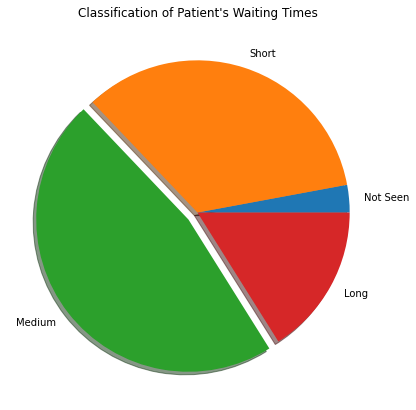

In [11]:
import matplotlib.pyplot as plt

# Finding the values of waiting time
wtt = ed16['WAITTIME'].value_counts()
print(wtt)

# Plotting a pie chart for waiting time classification
waittimelabel = ['Not Seen', 'Short', 'Medium', 'Long']
waittimedata = [593, 6935, 9500, 3263]
explode = (0.0, 0.0, 0.075, 0.0)

fig = plt.figure(figsize = (10, 7))
plt.pie(waittimedata,
        labels = waittimelabel,
        explode = explode,
        shadow = True)

plt.title("Classification of Patient's Waiting Times")
plt.show()

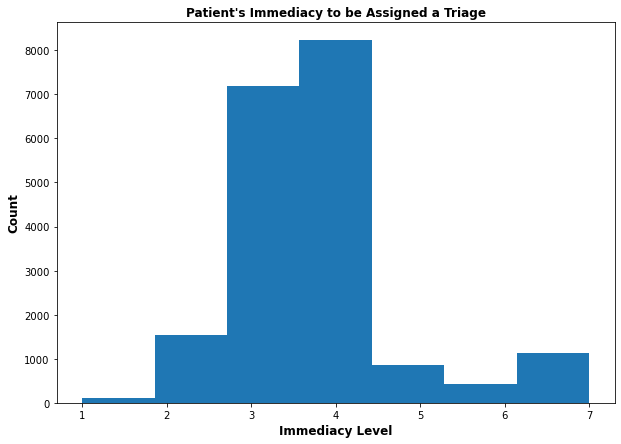

In [12]:
# Plotting a histogram for patient's immediacy to be assigned to a triage
immedrax = ed16.hist(column='IMMEDR',
                     bins = 7,
                     grid = False,
                     figsize = (10, 7))

immedrax = immedrax[0]
for x in immedrax:
    x.set_title("Patient's Immediacy to be Assigned a Triage",
                weight = 'bold',
                size = 12)
    x.set_xlabel("Immediacy Level",
                 weight = 'bold',
                 size = 12)
    x.set_ylabel("Count",
                 weight = 'bold',
                 size = 12)

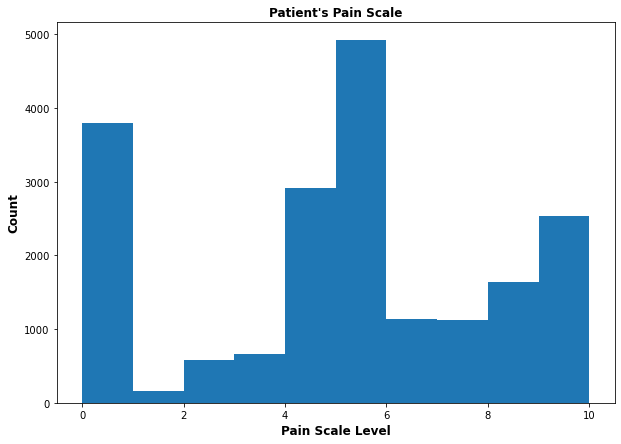

In [13]:
# Plotting a histogram for patient's described pain scale
psax = ed16.hist(column='PAINSCALE',
                     bins = 10,
                     grid = False,
                     figsize = (10, 7))

psax = psax[0]
for x in psax:
    x.set_title("Patient's Pain Scale",
                weight = 'bold',
                size = 12)
    x.set_xlabel("Pain Scale Level",
                 weight = 'bold',
                 size = 12)
    x.set_ylabel("Count",
                 weight = 'bold',
                 size = 12)